# Shape Detection with OpenCV

This notebook demonstrates how simple geometric shapes such as squares, triangles and circles in an image can be detected using the <b>OpenCV</b> library in Python.

To get started, you must have the following requirements installed:

1. `opencv-python` - the official Python implementation of the OpenCV library
2. `numpy` - for loading images as arrays
3. `matplotlib` - for displaying results graphically
4. `notebook` - to run this notebook in a Jupyter server

It is recommended to have a virtual environment to isolate these requirements from the rest of your system. This can be done using Python's `virtualenv` package.

First, open a <b>Terminal</b> (<b>Command Prompt</b> on Windows) and create a virtual environment:

```shell
python3 -m venv env
```

Next, activate the virtual environment. For Windows users:

```shell
.\env\Scripts\activate
```

For Linux and MacOS users:

```shell
source env/bin/activate
```

Now you can safely install the above requirements in your virtual environment:

```shell
pip install opencv-python numpy matplotlib notebook
```

After installation is complete, launch the Jupyter server to edit this notebook:

```shell
jupyter notebook
```

## Getting Started

First things first, import the necessary libraries into this notebook.

In [1]:
# imports

import cv2                         # opencv-python
import numpy as np                 # numpy
import matplotlib.pyplot as plt    # matplotlib

You can check whether `opencv-python` has been installed properly in your virtual environment:

In [2]:
# check opencv-python installation
print(f"Version of OpenCV installed: {cv2.__version__}")

Version of OpenCV installed: 4.9.0


Now that everything is ready, we can load the image to be processed from our disk.

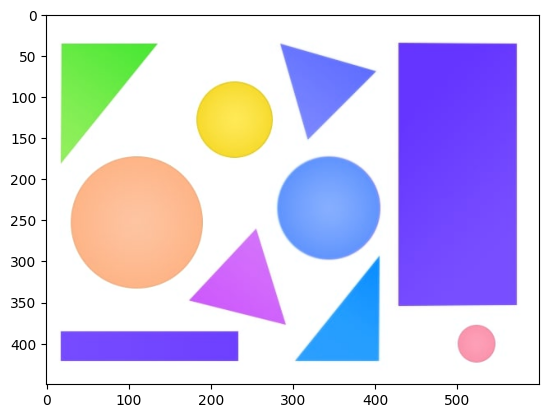

In [3]:
# load image from disk
img = cv2.imread("./img/shapes.jpg")

# display the loaded image
plt.imshow(img)

The `imread()` function from the `opencv-python` library returns a Numpy array, which is now stored in `img`.

## Image Preprocessing

After loading the image, we can process it using various methods to help accurately identify the shapes in it.

### 1. Grayscale Conversion

A common step of preprocessing done during image processing is <b>converting images to grayscale</b>. Grayscale images only have one channel which stores the <b>intensity</b> (brightness) of each pixel.

1. <b>Simplicity</b> - grayscale images are simpler to process than color images, since they only have one value (intensity) per pixel, instead of three values (R, G, B) as in color images.
2. <b>Reduced Complexity</b> - the simplicity of grayscale images results in requiring less computational power (less memory and time consumption) to process them.
3. <b>Feature Extraction</b> - grayscale images are more effective for algorithms that require feature extraction and analysis, such as edge detection, object recognition etc.

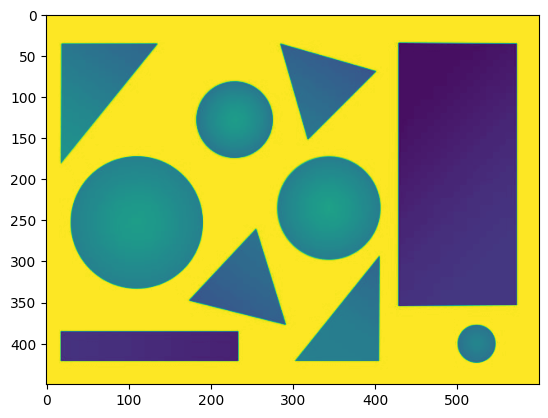

In [4]:
# convert the original image from the BGR (Blue, Green, Red) color space to grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### 2. Gaussian Blur

Gaussian blur is a type of image-blurring filter that uses a Gaussian distribution to calculate the weighted average of neighbouring pixels. Here is a simpler explanation of what happens in Gaussian blur:

<i>Imagine each pixel in your image as a tiny dot. When you apply Gaussian blur, each dot gets blended with its nearby dots, and the color of each dot becomes a weighted average of its neighbors. This "blurring" effect helps to reduce noise, soften details, and make the image look smoother.</i>

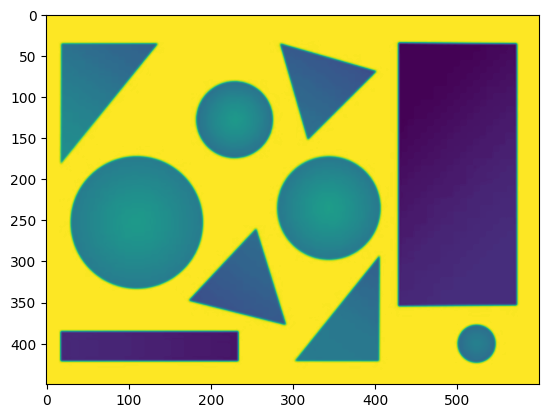

In [5]:
# apply a Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)

The `(5, 5)` argument passed into the `GaussianBlur()` function denotes the <b>kernel size</b>. Think of this as the size of the "paintbrush" 🖌️ used to blend the pixels together. A larger "paintbrush" (larger kernel) means more blending. For most scenarios, a `(5, 5)` kernel size is enough.

The `0` argument denotes the <b>standard deviation</b> (σ) in the Gaussian distribution. It works as follows:

1. A low standard deviation leads to a more "localized" blending effect. The blur is more focused on nearby pixels, and the image retains many of its fine details.
2. A high standard deviation leads to a more "extensize" blending effect. The fine details of the image are lost, and a smoother image is produced.

The standard deviation allows us to <b>control the trade-off</b> between reducing noise and preserving details in the image.

### 3. Canny Edge Detection

Further preprocessing can be done on the image using the `cv2.Canny()` function, which is used to implement Canny edge detection.

This is a popular <b>edge detection</b> algorithm that can be used to detect edges in images where rapid intensity changes can be noticed. In simpler terms, these are edges where the color of pixels change abruptly (e.g. the edges of the shapes, where the color changes between the image and the background).

The `cv2.Canny()` function takes in three parameters:

1. The <b>input image</b>
2. The <b>lower threshold</b> - this is used to identify <b>faint changes in intensity</b>. Pixels with gradients (changes in intensity) below this threshold are not considered as edges.
3. The <b>upper threshold</b> - this is used to identify <b>strong changes in intensity</b>. Pixels with gradients (changes in intensity) above this threshold are considered strong edges.

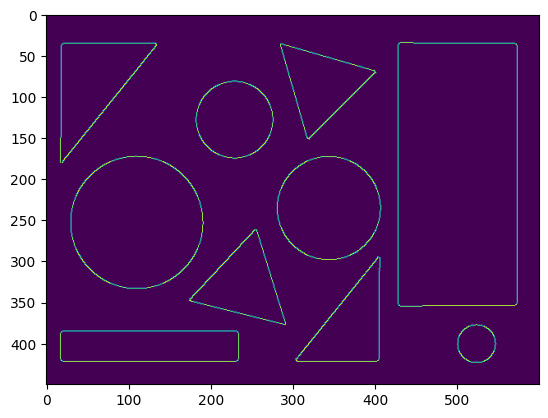

In [6]:
# create the edge map for the image using Canny edge detection

edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)

### 4. Thresholding

Thresholding is an image processing technique where pixel values are updated to specific values based on whether their intensity is below or above a certain <b>threshold</b>.

The `cv2.threshold()` function takes in the following parameters:

1. The <b>input image</b> - this must be a <b>grayscale</b> image.
2. The <b>threshold</b> - pixels with intensities lower than this value will be set to 0 (black).
3. The <b>maximum value</b> - pixels with intensities above the threshold will be set to this value.
4. The <b>type of thresholding</b> - here, basic thresholding is usually done by `cv2.THRESH_BINARY` (binary thresholding), where the pixels in the image will be either 0 or the maximum value.

This function returns two values:

1. A return code indicating the <b>type of thresholding</b> applied. This is not necessary in most cases, so we can set this to a throwaway variable (`_`).
2. The <b>thresholded image</b>.

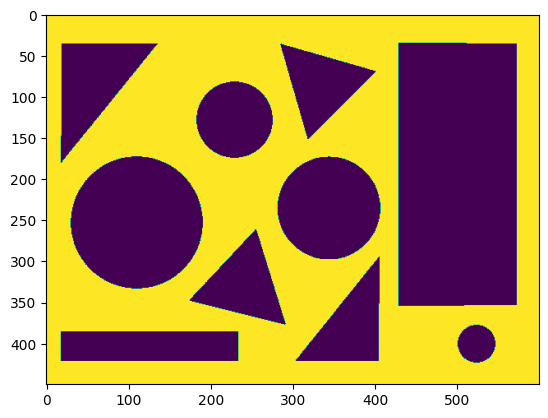

In [7]:
# threshold the grayscale image

_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

### 5. Contour Identification

Contours are the continuous curves or boundaries that form the <b>outlines of objects</b> in an image.

Contours have a wide range of applications in image processing and computer vision:
1. Object recognition
2. Shape analysis
3. Image segmentation etc.

The various properties of contours, such as area, perimeter, and orientation, can provide valuable information about the objects they represent.

`cv2.findContours()` is a function that identifies and returns contours in a <b>binary image</b>. It has three main parameters:

1. The <b>input image</b> - this must be a binary image
2. The </b>retrieval mode</b> - this specifies how the contours will be found. For example, `cv2.RETR_EXTERNAL` only retrieves the outermost contours. Any contours inside them are ignored.
3. The <b>approximation method</b> - this specifies the level of detail in the contours. For example, `cv2.CHAIN_APPROX_SIMPLE` compresses horizontal, vertical and diagonal segments and leaves only their end points. This makes storing contours efficient when the image is not too detailed.

This function returns two values:

1. <b>Contours</b> - a Python list containing the coordinates of the points that make up each contour, i.e. each contour is represented as a list of points.
2. <b>Heirarchy</b> - this describes the relationships between the contours. For simple scenarios like this image (where only external contours are considered), the heirarchy can be ignored (stored in a throwaway variable `_`).

In [8]:
# find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

(array([[[  0,   0]],

       [[  0, 449]],

       [[599, 449]],

       [[599,   0]]], dtype=int32),)


Next, we can map these contours onto the original image. For this, we use the `cv2.drawContours()` function.

This function takes in the following parameters:

1. The <b>input image</b> - in this case, the original image (the `img` variable from above).
2. The list of <b>contours</b> obtained - stored in the `contours` variable.
3. The <b>index</b> of the contour(s) to be drawn - to draw all contours in the list, use `-1`.
4. The <b>color</b> of the contours drawn - for example, `(0, 255, 0)` draws green contours on the image.
5. The <b>thickness</b> of the contour lines, specified by an integer.

In [9]:
# draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

The image with the contours is depicted below.

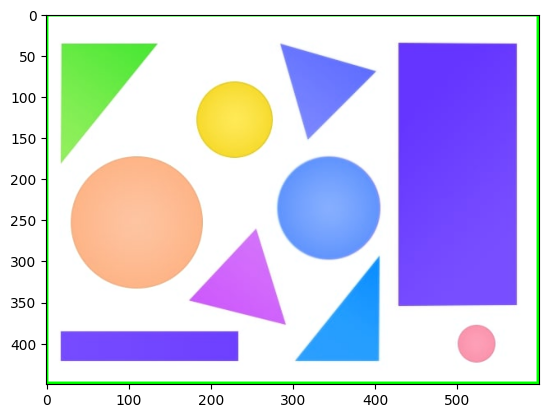

In [10]:
# draw the original image (after applying contours)
plt.imshow(img)

## Object Detection

Using the above-mentioned preprocessing steps, we can now identify shapes in an image.

Consider the below function where we detect triangles in an input image.

In [11]:
# function to find triangles in an image

def find_triangles(image_path):
    # load the image from the path
    img = cv2.imread(image_path)

    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # apply Gaussian blur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # use Canny edge detection to find edges in the image
    edges = cv2.Canny(blurred, 50, 150)

    # find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # iterate through the contours
    for contour in contours:
        # approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # if the polygon has 3 vertices, it's a triangle
        if len(approx) == 3:
            # draw a bounding box around the triangle (in red)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # convert BGR image to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plot the image with triangles
    plt.imshow(img_rgb)
    plt.title('Triangles with Bounding Boxes')
    plt.show()

Observe how the above function performs when provided an image as input.

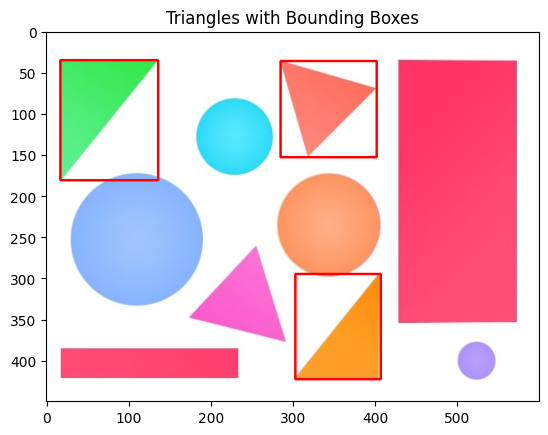

In [12]:
# call find_triangles() function with input image
find_triangles("./img/shapes.jpg")